In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_sales = pd.read_csv('archive/sales data-set.csv')
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [88]:
df_features = pd.read_csv('archive/Features data set.csv')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
df_stores = pd.read_csv('archive/stores data-set.csv')
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [7]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [8]:
# convert date variable type into date type in df_sales

df_sales['Date'] = df_sales['Date'].astype('str')
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [133]:
# convert date variable type into date type in df_features

df_features['Date'] = df_features['Date'].astype('str')
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [10]:
# merge the table(df_sales, df_features)

sales_features = df_sales.merge(df_features, on = ['Store','Date','IsHoliday'], how = 'left')
sales_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [11]:
# remove the MarkDown variables because we don't use in this analysis

sales_features.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True)

In [12]:
sales_features.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,211.350143,8.106


In [13]:
merge_df = sales_features.merge(df_stores, on = ['Store'], how = 'left')
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


In [14]:
merge_df['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

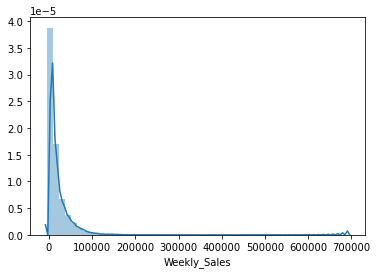

In [15]:
sns.distplot(merge_df['Weekly_Sales']);

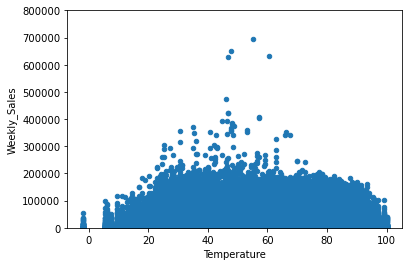

In [16]:
# Relationship with numerical variables

# scatter plot Temperature/Weekly_Sales

var = 'Temperature'
data = pd.concat([merge_df['Weekly_Sales'], merge_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'Weekly_Sales', ylim = (0,800000));

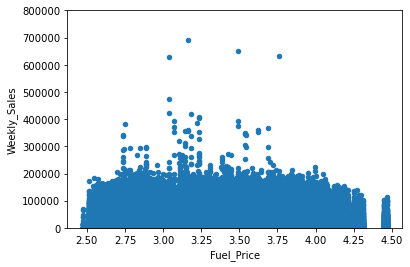

In [17]:
# scatter plot Fuel_Price/Weekly_Sales

var = 'Fuel_Price'
data = pd.concat([merge_df['Weekly_Sales'], merge_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'Weekly_Sales', ylim = (0,800000));

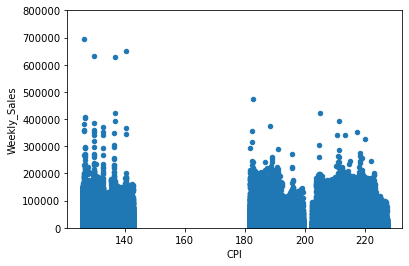

In [18]:
# scatter plot CPI/Weekly_Sales

var = 'CPI'
data = pd.concat([merge_df['Weekly_Sales'], merge_df[var]], axis = 1)
data.plot.scatter(x = var, y = 'Weekly_Sales', ylim = (0,800000));

In [19]:
#Weekly_Sales of each Store
merge_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [20]:
merge_df.groupby('Store')['Weekly_Sales'].mean()

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: Weekly_Sales, dtype: float64

In [21]:
#Weekly_Sales of each store type

merge_df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [22]:
merge_df.groupby('Type')['Weekly_Sales'].mean()

Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: Weekly_Sales, dtype: float64

In [66]:
#Weekly_Sales of each of the Date

df2=merge_df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df2.head()

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [ ]:
merge_df['IsHolidayNumeric']=merge_df['IsHoliday'].apply(lambda x:1 if (str(x)=="True") else 0)

In [75]:
df2['IsHoliday'] = merge_df['IsHolidayNumeric']
df2.head()

,Date,Weekly_Sales,IsHoliday
0,2010-01-10,42239875.87,0
1,2010-02-04,50423831.26,1
2,2010-02-07,48917484.50,0
3,2010-02-19,48276993.78,0
4,2010-02-26,43968571.13,0


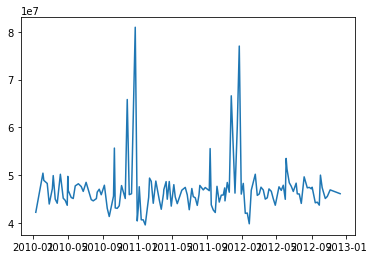

In [76]:
plt.plot(df2['Date'], df2['Weekly_Sales'])

In [101]:
# CPI Analysis

df3 = merge_df.groupby(by = ['Date'], as_index = False)['CPI'].sum()
df3.head()

df2['CPI'] = df3['CPI']
df2.head()

,Date,Weekly_Sales,IsHoliday,CPI
0,2010-01-10,42239875.87,0,493094.485613
1,2010-02-04,50423831.26,1,493597.239524
2,2010-02-07,48917484.50,0,489073.740420
3,2010-02-19,48276993.78,0,498168.102706
4,2010-02-26,43968571.13,0,494856.196950


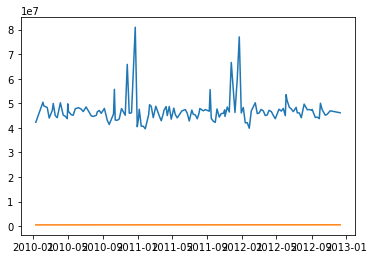

In [103]:
plt.plot(df2['Date'], df2['Weekly_Sales'])
plt.plot(df2['Date'], df2['CPI'])

In [110]:
# Unemployment analysis

df4 = merge_df.groupby('Date', as_index = False)['Unemployment'].sum()
df4.head()

,Date,Unemployment
0,2010-01-10,24753.673
1,2010-02-04,24892.780
2,2010-02-07,24426.377
3,2010-02-19,25531.797
4,2010-02-26,25264.617


In [111]:
df2['Unemployment'] = df4['Unemployment']

In [112]:
df2.head()

,Date,Weekly_Sales,IsHoliday,CPI,Unemployment
0,2010-01-10,42239875.87,0,493094.485613,24753.673
1,2010-02-04,50423831.26,1,493597.239524,24892.780
2,2010-02-07,48917484.50,0,489073.740420,24426.377
3,2010-02-19,48276993.78,0,498168.102706,25531.797
4,2010-02-26,43968571.13,0,494856.196950,25264.617


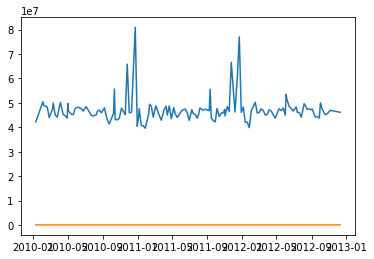

In [113]:
plt.plot(df2['Date'], df2['Weekly_Sales'])
plt.plot(df2['Date'], df2['Unemployment'])

In [140]:
# Correlation matrix

new_df = df_sales.merge(df_features, on = ['Store', 'Date', 'IsHoliday'], how = 'left')
new_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [142]:
new_df = new_df.merge(df_stores, on = 'Store', how = 'left')
new_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


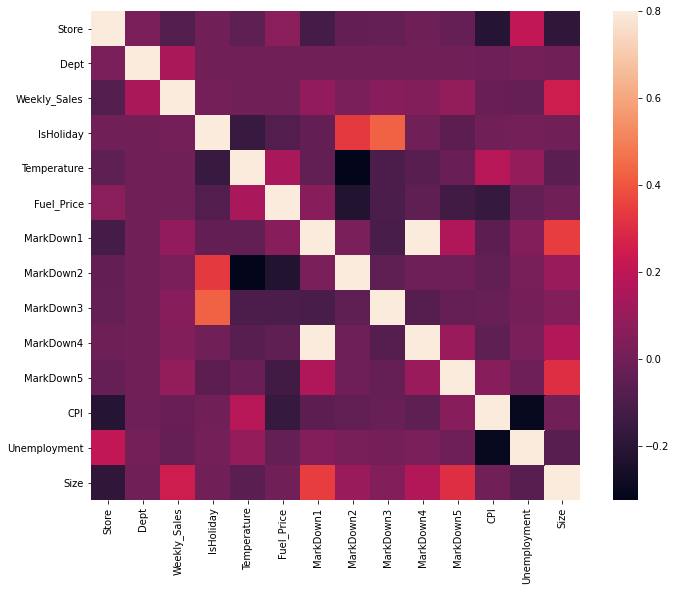

In [147]:
corrmat = new_df.corr()
plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True);

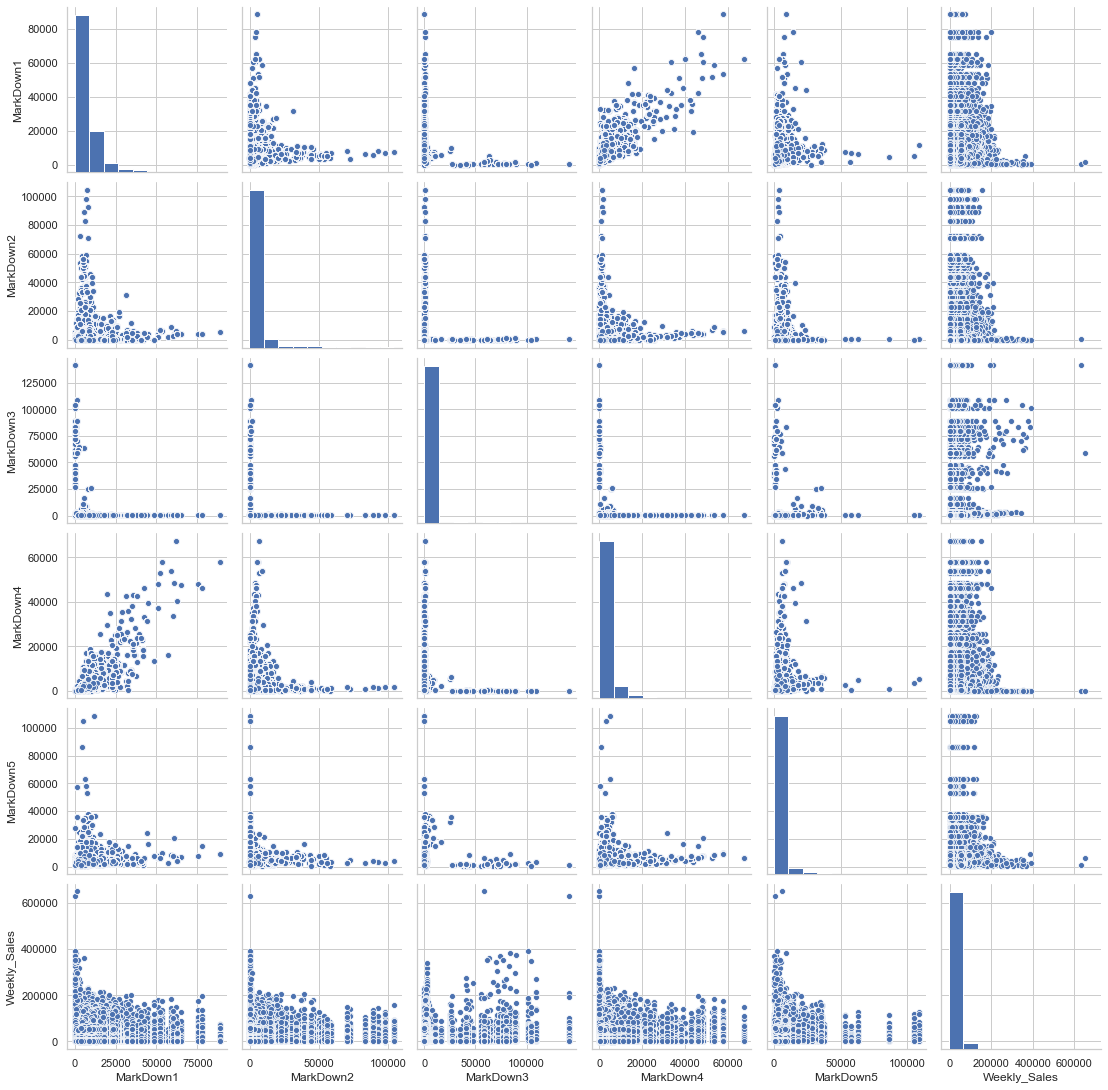

In [154]:
# scatter plot

sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(new_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5','Weekly_Sales']], height = 2.5)
plt.show()

In [157]:
# missing data

total = new_df.isnull().sum().sort_values(ascending=False)
percent = (new_df.isnull().sum() / new_df.isnull().count()).sort_values(ascending = False)

In [160]:
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MarkDown2,310322,0.736110
MarkDown4,286603,0.679847
MarkDown3,284479,0.674808
MarkDown1,270889,0.642572
MarkDown5,270138,0.640790
Size,0,0.000000
Type,0,0.000000
Unemployment,0,0.000000
CPI,0,0.000000
Fuel_Price,0,0.000000


In [168]:
new_df.dropna(axis = 0, how = 'any')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
92,1,1,2011-11-11,18689.54,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,A,151315
93,1,1,2011-11-18,19050.66,False,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,A,151315
94,1,1,2011-11-25,20911.25,True,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,A,151315
95,1,1,2011-02-12,25293.49,False,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,A,151315
96,1,1,2011-09-12,33305.92,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421561,45,98,2012-08-31,346.04,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221
421562,45,98,2012-07-09,352.44,True,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,B,118221
421564,45,98,2012-09-21,467.30,False,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684,B,118221
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
